In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
folder="https://raw.githubusercontent.com/hh26/EPL-Predictions/master/CSV/"

x_train = pd.read_csv(folder+'XTRAIN.csv')
y_train = pd.read_csv(folder+'YTRAIN.csv')
x_test = pd.read_csv(folder+'XTEST.csv')
y_test = pd.read_csv(folder+'YTEST.csv')
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

# Linear Kernel

## Class A features alone:

In [4]:
classAfeatures=['HForm', 'AForm', 'HSt', 'ASt', 'HSTKPP', 'ASTKPP', 'HGKPP', 'AGKPP',
       'HCKPP', 'ACKPP', 'HAttack', 'AAttack', 'HMidField', 'AMidField',
       'HDefence', 'ADefence', 'HOverall', 'AOverall', 'HTGD', 'ATGD',
       'HStWeighted', 'AStWeighted']

In [5]:
x_train_a=x_train[classAfeatures]
x_test_a=x_test[classAfeatures]

In [6]:
SVML=SVC(kernel='linear')
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_a,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_a,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_a,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_a,y_test)))

Cross Validation Score for Class A features: 0.5391828784359272
Validation Accuracy: 0.5478927203065134
Testing Accuracy: 0.5


In [ ]:
params={'C':[1,2,3,4,5,6,7,8,9,10],'gamma':[0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20]}
grid=GridSearchCV(estimator=SVML,param_grid=params,scoring='accuracy',return_train_score=True,cv=5,verbose=5,n_jobs=-1)
grid.fit(x_train_a,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 119.0min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 161.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=5)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.01}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


{'C': 1, 'gamma': 0.01}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
SVML=SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
#SVML=grid.best_estimator_
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_a,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_a,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_a,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_a,y_test)))

Cross Validation Score for Class A features: 0.48659020518776613
Validation Accuracy: 0.5022640195053988
Testing Accuracy: 0.4703125


RFE

In [8]:
from sklearn.feature_selection import RFE
rfe=RFE(SVML,n_features_to_select=1,step=1)
rfe.fit(x_train_a,y_train)
Ranks=rfe.ranking_

In [9]:
FeatureRanks={}
for i in range(0,len(classAfeatures)):
    FeatureRanks[classAfeatures[i]]=Ranks[i]
FeatureRanks
delfeatures=[]
for key,value in FeatureRanks.items():
    if(value>=15):
        delfeatures.append(key)
    
delfeatures

['ASTKPP',
 'HAttack',
 'AAttack',
 'AMidField',
 'HDefence',
 'HOverall',
 'HTGD',
 'ATGD']

In [10]:
x_train_a.drop(delfeatures, axis = 1, inplace = True)
x_test_a.drop(delfeatures, axis = 1, inplace = True)

D:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
#SVML=grid.best_estimator_
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_a,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_a,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_a,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_a,y_test)))

Cross Validation Score for Class A features: 0.49180579752226095
Validation Accuracy: 0.5060954371299199
Testing Accuracy: 0.4640625


In [12]:
y_pred=SVML.predict(x_test_a)
labels=['H','A','D']

ConfusionMatrix= confusion_matrix(y_test,y_pred,labels)
print(ConfusionMatrix)

[[159  73  58]
 [ 44 103  42]
 [ 59  67  35]]


D:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['H', 'A', 'D'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [13]:
print(classification_report(y_test,y_pred,labels))

              precision    recall  f1-score   support

           H       0.61      0.55      0.58       290
           A       0.42      0.54      0.48       189
           D       0.26      0.22      0.24       161

    accuracy                           0.46       640
   macro avg       0.43      0.44      0.43       640
weighted avg       0.47      0.46      0.46       640



### RPS Score

In [14]:
prob_pred = SVML.predict_proba(x_test_a)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_pred), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):
        sum1=0

        for i in range(0, r):
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1

            for j in range(0, i):
                sum2 += p[x][j]-obs[j]

            sum1 += sum2**2
        rps.append(sum1/(r-1))

    #print(rps)

    #print('RPS:' + str(sum(rps)/n))
    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.20613326622589864


In [15]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
  if(i=='H'):
    Home+=1;
  elif(i=='A'):
    Away+=1;
  else:
    Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

In [16]:
Predicted=[]
PHome=PAway=PDraw=0
for i in y_pred:
  if(i=='H'):
    PHome+=1;
  elif(i=='A'):
    PAway+=1;
  else:
    PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

#### Plots


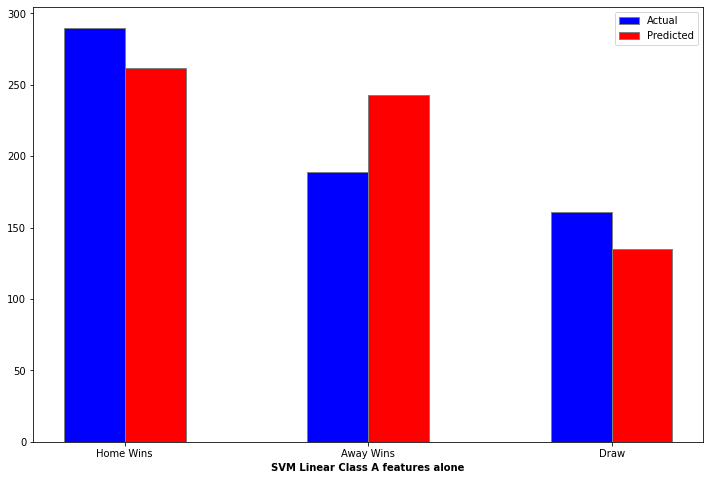

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
      
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 
   
# Adding Xticks  
plt.xlabel('SVM Linear Class A features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")   
plt.show()

## Class B features alone:

In [4]:
classBfeatures=['FormDifferential', 'StDifferential',
       'STKPP', 'GKPP', 'CKPP', 'RelAttack', 'RelMidField', 'RelDefence',
       'RelOverall', 'GDDifferential', 'StWeightedDifferential']

In [5]:
x_train_b=x_train[classBfeatures]
x_test_b=x_test[classBfeatures]

In [6]:
x_train_b

,FormDifferential,StDifferential,STKPP,GKPP,CKPP,RelAttack,RelMidField,RelDefence,RelOverall,GDDifferential,StWeightedDifferential
0,1.194542,0.333333,-1.333333,0.333333,-0.500000,3,6,-5,1,5,0.333333
1,2.608709,0.666667,3.666667,1.166667,-0.500000,3,13,8,9,14,0.650794
2,-0.303694,-0.333333,-2.166667,-0.500000,-0.166667,6,3,-2,2,-5,-0.126984
3,0.700445,0.388889,-1.833333,0.500000,1.000000,11,13,14,12,6,0.396825
4,0.529287,0.222222,0.500000,0.000000,-2.666667,10,1,2,4,6,0.079365
...,...,...,...,...,...,...,...,...,...,...,...
2866,-0.663888,-0.666667,-2.166667,-1.500000,-1.166667,-5,-7,-6,-6,-57,-0.777778
2867,0.476009,-0.111111,-0.500000,-1.166667,0.333333,-9,-3,-7,-7,-13,0.015873
2868,1.806177,0.222222,-0.333333,0.333333,-0.333333,-5,-1,-2,-2,-15,0.412698
2869,0.573450,0.333333,2.000000,1.166667,0.500000,5,9,4,6,20,0.285714


In [7]:
SVML=SVC(kernel='linear', probability = True,gamma='scale',class_weight='balanced')
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_b,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class B features alone: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_b,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_b,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_b,y_test)))

Cross Validation Score for Class B features alone: 0.5012219318621758
Validation Accuracy: 0.5134099616858238
Testing Accuracy: 0.475


In [8]:
SVML=SVC(kernel='linear', probability = True,class_weight='balanced')
params={'C':[1,2,3,4,5,6,7,8,9,10],'gamma':[0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20]}
grid=GridSearchCV(estimator=SVML,param_grid=params,scoring='accuracy',return_train_score=True,cv=5,verbose=5,n_jobs=-1)
grid.fit(x_train_b,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 149.6min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 224.3min finished


GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', kernel='linear',
                           probability=True),
             n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]},
             return_train_score=True, scoring='accuracy', verbose=5)

In [9]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.01}
SVC(C=1, class_weight='balanced', gamma=0.01, kernel='linear', probability=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [22]:
SVML=SVC(C=1, class_weight='balanced', gamma=0.01, kernel='linear', probability=True)

crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_b,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class B features alone: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_b,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_b,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_b,y_test)))

Cross Validation Score for Class B features alone: 0.5012219318621758
Validation Accuracy: 0.5134099616858238
Testing Accuracy: 0.475


In [23]:
cols1=['StDifferential','RelAttack','RelMidField','RelDefence']
x_train_b.drop(cols1, axis = 1 , inplace = True)
x_test_b.drop(cols1, axis = 1 , inplace = True)

D:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
grid=GridSearchCV(estimator=SVML,param_grid=params,scoring='accuracy',return_train_score=True,cv=5,verbose=5,n_jobs=-1)
grid.fit(x_train_b,y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed: 12.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.01,
                           kernel='rbf', max_iter=-1, probability=True,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=5)

In [33]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'class_weight': None, 'gamma': 0.01}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [24]:
SVML=SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_b,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class B features alone: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_b,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_b,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_b,y_test)))

Cross Validation Score for Class B features alone: 0.4890268099109562
Validation Accuracy: 0.511320097526994
Testing Accuracy: 0.4546875


In [8]:
y_pred=SVML.predict(x_test_b)
labels=['H','A','D']

ConfusionMatrix= confusion_matrix(y_test,y_pred,labels)
print(ConfusionMatrix)

[[159  61  70]
 [ 47  92  50]
 [ 58  50  53]]


D:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['H', 'A', 'D'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [9]:
print(classification_report(y_test,y_pred,labels))

              precision    recall  f1-score   support

           H       0.60      0.55      0.57       290
           A       0.45      0.49      0.47       189
           D       0.31      0.33      0.32       161

    accuracy                           0.48       640
   macro avg       0.45      0.45      0.45       640
weighted avg       0.48      0.47      0.48       640



### RPS Score

In [10]:
prob_pred = SVML.predict_proba(x_test_b)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_pred), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):
        sum1=0

        for i in range(0, r):
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1

            for j in range(0, i):
                sum2 += p[x][j]-obs[j]

            sum1 += sum2**2
        rps.append(sum1/(r-1))

    #print(rps)

    #print('RPS:' + str(sum(rps)/n))
    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.20477581122206204


In [11]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
  if(i=='H'):
    Home+=1;
  elif(i=='A'):
    Away+=1;
  else:
    Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

In [12]:
Predicted=[]
PHome=PAway=PDraw=0
for i in y_pred:
  if(i=='H'):
    PHome+=1;
  elif(i=='A'):
    PAway+=1;
  else:
    PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

#### Plots


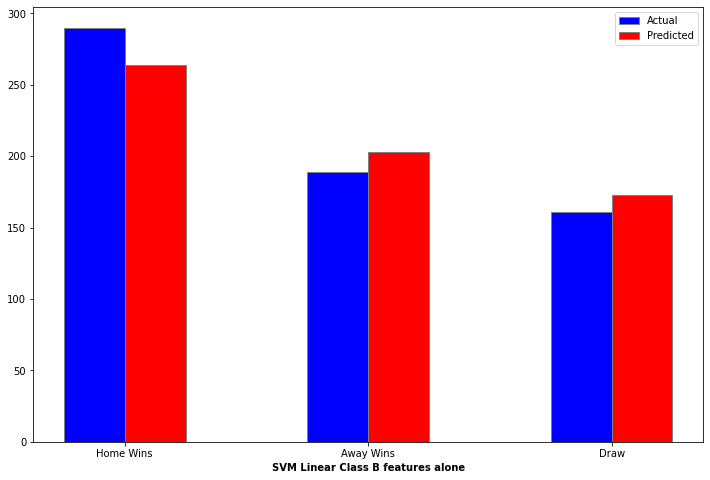

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
      
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 
   
# Adding Xticks  
plt.xlabel('SVM Linear Class B features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")   
plt.show()

# RBF Kernel

## Class A features alone:

In [14]:
classAfeatures=['HForm', 'AForm', 'HSt', 'ASt', 'HSTKPP', 'ASTKPP', 'HGKPP', 'AGKPP',
       'HCKPP', 'ACKPP', 'HAttack', 'AAttack', 'HMidField', 'AMidField',
       'HDefence', 'ADefence', 'HOverall', 'AOverall', 'HTGD', 'ATGD',
       'HStWeighted', 'AStWeighted']

In [15]:
x_train_a_rbf=x_train[classAfeatures]
x_test_a_rbf=x_test[classAfeatures]

In [16]:
x_train_a_rbf

,HForm,AForm,HSt,ASt,HSTKPP,ASTKPP,HGKPP,AGKPP,HCKPP,ACKPP,...,HMidField,AMidField,HDefence,ADefence,HOverall,AOverall,HTGD,ATGD,HStWeighted,AStWeighted
0,1.735889,0.541347,0.611111,0.277778,5.166667,6.500000,1.166667,0.833333,6.000000,6.500000,...,77,71,70,75,75,74,2,-3,0.714286,0.380952
1,3.425197,0.816488,1.000000,0.333333,7.833333,4.166667,2.000000,0.833333,5.666667,6.166667,...,88,75,85,77,87,78,10,-4,1.000000,0.349206
2,0.832549,1.136243,0.277778,0.611111,4.666667,6.833333,0.666667,1.166667,5.500000,5.666667,...,80,77,76,78,80,78,-3,2,0.396825,0.523810
3,0.912100,0.211655,0.444444,0.055556,3.666667,5.500000,1.000000,0.500000,5.000000,4.000000,...,79,66,79,65,80,68,-1,-7,0.492063,0.095238
4,0.994804,0.465517,0.500000,0.277778,5.833333,5.333333,0.833333,0.833333,2.666667,5.333333,...,79,78,76,74,79,75,2,-4,0.365079,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,0.873288,1.537176,0.055556,0.722222,3.500000,5.666667,0.333333,1.833333,5.333333,6.500000,...,74,81,74,80,74,80,-32,25,0.095238,0.873016
2867,1.159595,0.683586,0.555556,0.666667,4.833333,5.333333,1.333333,2.500000,5.500000,5.166667,...,76,79,73,80,75,82,8,21,0.634921,0.619048
2868,2.081891,0.275714,0.722222,0.500000,4.000000,4.333333,1.833333,1.500000,5.333333,5.666667,...,73,74,73,75,74,76,-17,-2,0.888889,0.476190
2869,0.821993,0.248543,0.555556,0.222222,5.833333,3.833333,2.000000,0.833333,5.000000,4.500000,...,80,71,78,74,80,74,1,-19,0.571429,0.285714


In [34]:
SVML=SVC(kernel='rbf', probability = True)
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_a_rbf,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_a_rbf,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_a_rbf,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_a_rbf,y_test)))

Cross Validation Score for Class A features: 0.5412746806039488
Validation Accuracy: 0.5426680599094392
Testing Accuracy: 0.49375


In [26]:
#SVML=SVC(kernel='rbf', probability = True)
#params={'C':[1,2,3,4,5,6,7,8,9,10],'gamma':[0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20]}
#grid=GridSearchCV(estimator=SVML,param_grid=params,scoring='accuracy',return_train_score=True,cv=5,verbose=5,n_jobs=-1)
#grid.fit(x_train_a,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  8.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=5)

In [27]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.01}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [35]:
SVML=SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_a_rbf,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_a_rbf,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_a_rbf,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_a_rbf,y_test)))

Cross Validation Score for Class A features: 0.4552458381726675
Validation Accuracy: 0.6715430163706025
Testing Accuracy: 0.4484375


In [17]:
nonGaussianDistcols = ['HAttack', 'AAttack', 'HMidField', 'AMidField','HDefence', 'ADefence']
x_train_a_rbf.drop(nonGaussianDistcols, axis = 1 , inplace = True)
x_test_a_rbf.drop(nonGaussianDistcols, axis = 1 , inplace = True)

D:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
SVML=SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
params={'C':[1,2,3,4,5,6,7,8,9,10],'gamma':[0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20]}
grid=GridSearchCV(estimator=SVML,param_grid=params,scoring='balanced_accuracy',return_train_score=True,cv=5,verbose=5,n_jobs=-1)
grid.fit(x_train_a_rbf,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  4.3min finished


GridSearchCV(cv=5,
             estimator=SVC(C=1, class_weight='balanced', gamma=0.01,
                           probability=True),
             n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]},
             return_train_score=True, scoring='balanced_accuracy', verbose=5)

In [28]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.01}
SVC(C=1, class_weight='balanced', gamma=0.01, probability=True)


In [29]:
SVML=SVC(C=1, class_weight='balanced', gamma=0.01, probability=True)
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_a_rbf,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_a_rbf,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_a_rbf,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_a_rbf,y_test)))

Cross Validation Score for Class A features: 0.4688274293457221
Validation Accuracy: 0.5764541971438523
Testing Accuracy: 0.45625


In [30]:
y_pred=SVML.predict(x_test_a_rbf)
labels=['H','A','D']

ConfusionMatrix= confusion_matrix(y_test,y_pred,labels)
print(ConfusionMatrix)

[[139  60  91]
 [ 41 102  46]
 [ 55  55  51]]


D:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['H', 'A', 'D'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [31]:
print(classification_report(y_test,y_pred,labels))

              precision    recall  f1-score   support

           H       0.59      0.48      0.53       290
           A       0.47      0.54      0.50       189
           D       0.27      0.32      0.29       161

    accuracy                           0.46       640
   macro avg       0.44      0.45      0.44       640
weighted avg       0.48      0.46      0.46       640



### RPS Score

In [32]:
prob_pred = SVML.predict_proba(x_test_a_rbf)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_pred), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):
        sum1=0

        for i in range(0, r):
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1

            for j in range(0, i):
                sum2 += p[x][j]-obs[j]

            sum1 += sum2**2
        rps.append(sum1/(r-1))

    #print(rps)

    #print('RPS:' + str(sum(rps)/n))
    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.20988803574928877


In [33]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
  if(i=='H'):
    Home+=1;
  elif(i=='A'):
    Away+=1;
  else:
    Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

In [34]:
Predicted=[]
PHome=PAway=PDraw=0
for i in y_pred:
  if(i=='H'):
    PHome+=1;
  elif(i=='A'):
    PAway+=1;
  else:
    PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

#### Plots


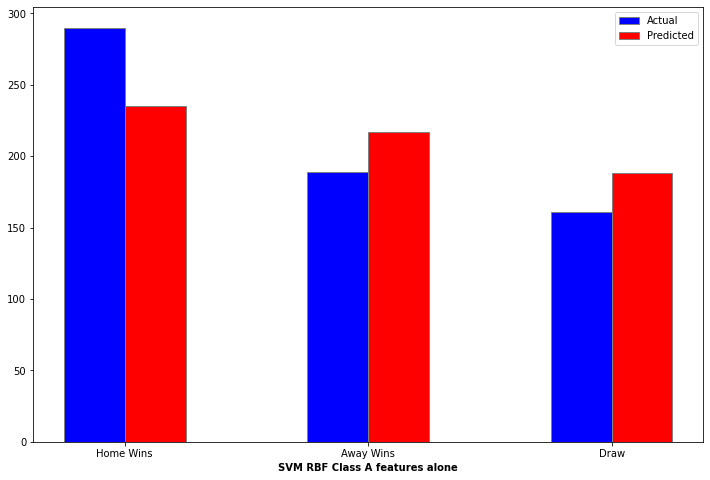

In [35]:
import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
      
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 
   
# Adding Xticks  
plt.xlabel('SVM RBF Class A features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")   
plt.show()

## Class B features alone:

In [36]:
classBfeatures=['FormDifferential', 'StDifferential',
       'STKPP', 'GKPP', 'CKPP', 'RelAttack', 'RelMidField', 'RelDefence',
       'RelOverall', 'GDDifferential', 'StWeightedDifferential']

In [37]:
x_train_b_rbf=x_train[classBfeatures]
x_test_b_rbf=x_test[classBfeatures]

In [38]:
x_train_b_rbf

,FormDifferential,StDifferential,STKPP,GKPP,CKPP,RelAttack,RelMidField,RelDefence,RelOverall,GDDifferential,StWeightedDifferential
0,1.194542,0.333333,-1.333333,0.333333,-0.500000,3,6,-5,1,5,0.333333
1,2.608709,0.666667,3.666667,1.166667,-0.500000,3,13,8,9,14,0.650794
2,-0.303694,-0.333333,-2.166667,-0.500000,-0.166667,6,3,-2,2,-5,-0.126984
3,0.700445,0.388889,-1.833333,0.500000,1.000000,11,13,14,12,6,0.396825
4,0.529287,0.222222,0.500000,0.000000,-2.666667,10,1,2,4,6,0.079365
...,...,...,...,...,...,...,...,...,...,...,...
2866,-0.663888,-0.666667,-2.166667,-1.500000,-1.166667,-5,-7,-6,-6,-57,-0.777778
2867,0.476009,-0.111111,-0.500000,-1.166667,0.333333,-9,-3,-7,-7,-13,0.015873
2868,1.806177,0.222222,-0.333333,0.333333,-0.333333,-5,-1,-2,-2,-15,0.412698
2869,0.573450,0.333333,2.000000,1.166667,0.500000,5,9,4,6,20,0.285714


In [42]:
SVML=SVC(kernel='rbf', probability = True)
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_b_rbf,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class B features alone: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_b_rbf,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_b_rbf,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_b_rbf,y_test)))

Cross Validation Score for Class B features alone: 0.5444057297715834
Validation Accuracy: 0.54858934169279
Testing Accuracy: 0.5046875


In [43]:
SVML=SVC(kernel='rbf', probability = True)
params={'C':[1,2,3,4,5,6,7,8,9,10],'gamma':[0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20], 'class_weight':[None,'balanced']}
grid=GridSearchCV(estimator=SVML,param_grid=params,scoring='balanced_accuracy',return_train_score=True,cv=5,verbose=5,n_jobs=-1)
grid.fit(x_train_b_rbf,y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  8.5min finished


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]},
             return_train_score=True, scoring='balanced_accuracy', verbose=5)

In [44]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'class_weight': 'balanced', 'gamma': 0.01}
SVC(C=1, class_weight='balanced', gamma=0.01, probability=True)


In [45]:
SVML=SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_b_rbf,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_b_rbf,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_b_rbf,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_b_rbf,y_test)))

Cross Validation Score for Class A features: 0.48554853852109947
Validation Accuracy: 0.5555555555555556
Testing Accuracy: 0.459375


In [48]:
x_train_b_rbf

,FormDifferential,StDifferential,STKPP,GKPP,CKPP,RelAttack,RelMidField,RelDefence,RelOverall,GDDifferential,StWeightedDifferential
0,1.194542,0.333333,-1.333333,0.333333,-0.500000,3,6,-5,1,5,0.333333
1,2.608709,0.666667,3.666667,1.166667,-0.500000,3,13,8,9,14,0.650794
2,-0.303694,-0.333333,-2.166667,-0.500000,-0.166667,6,3,-2,2,-5,-0.126984
3,0.700445,0.388889,-1.833333,0.500000,1.000000,11,13,14,12,6,0.396825
4,0.529287,0.222222,0.500000,0.000000,-2.666667,10,1,2,4,6,0.079365
...,...,...,...,...,...,...,...,...,...,...,...
2866,-0.663888,-0.666667,-2.166667,-1.500000,-1.166667,-5,-7,-6,-6,-57,-0.777778
2867,0.476009,-0.111111,-0.500000,-1.166667,0.333333,-9,-3,-7,-7,-13,0.015873
2868,1.806177,0.222222,-0.333333,0.333333,-0.333333,-5,-1,-2,-2,-15,0.412698
2869,0.573450,0.333333,2.000000,1.166667,0.500000,5,9,4,6,20,0.285714


In [49]:
cols1=['StDifferential','RelAttack','RelMidField','RelDefence']
x_train_b_rbf.drop(cols1, axis = 1 , inplace = True)
x_test_b_rbf.drop(cols1, axis = 1 , inplace = True)

D:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
grid=GridSearchCV(estimator=SVML,param_grid=params,scoring='balanced_accuracy',return_train_score=True,cv=5,verbose=5,n_jobs=-1)
grid.fit(x_train_b_rbf,y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  6.9min finished


GridSearchCV(cv=5,
             estimator=SVC(C=1, class_weight='balanced', gamma=0.01,
                           probability=True),
             n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]},
             return_train_score=True, scoring='balanced_accuracy', verbose=5)

In [52]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 2, 'class_weight': 'balanced', 'gamma': 0.01}
SVC(C=2, class_weight='balanced', gamma=0.01, probability=True)


In [39]:
SVML=SVC(C=2, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_b_rbf,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_b_rbf,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_b_rbf,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_b_rbf,y_test)))

Cross Validation Score for Class A features: 0.4747483546264034
Validation Accuracy: 0.5869035179380007
Testing Accuracy: 0.4640625


In [40]:
y_pred=SVML.predict(x_test_b_rbf)
labels=['H','A','D']

ConfusionMatrix= confusion_matrix(y_test,y_pred,labels)
print(ConfusionMatrix)

[[140  51  99]
 [ 33  91  65]
 [ 47  48  66]]


D:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['H', 'A', 'D'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [41]:
print(classification_report(y_test,y_pred,labels))

              precision    recall  f1-score   support

           H       0.64      0.48      0.55       290
           A       0.48      0.48      0.48       189
           D       0.29      0.41      0.34       161

    accuracy                           0.46       640
   macro avg       0.47      0.46      0.46       640
weighted avg       0.50      0.46      0.48       640



### RPS Score

In [42]:
prob_pred = SVML.predict_proba(x_test_b_rbf)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_pred), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):
        sum1=0

        for i in range(0, r):
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1

            for j in range(0, i):
                sum2 += p[x][j]-obs[j]

            sum1 += sum2**2
        rps.append(sum1/(r-1))

    #print(rps)

    #print('RPS:' + str(sum(rps)/n))
    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.20796403042582384


In [43]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
  if(i=='H'):
    Home+=1;
  elif(i=='A'):
    Away+=1;
  else:
    Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

In [44]:
Predicted=[]
PHome=PAway=PDraw=0
for i in y_pred:
  if(i=='H'):
    PHome+=1;
  elif(i=='A'):
    PAway+=1;
  else:
    PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

#### Plots


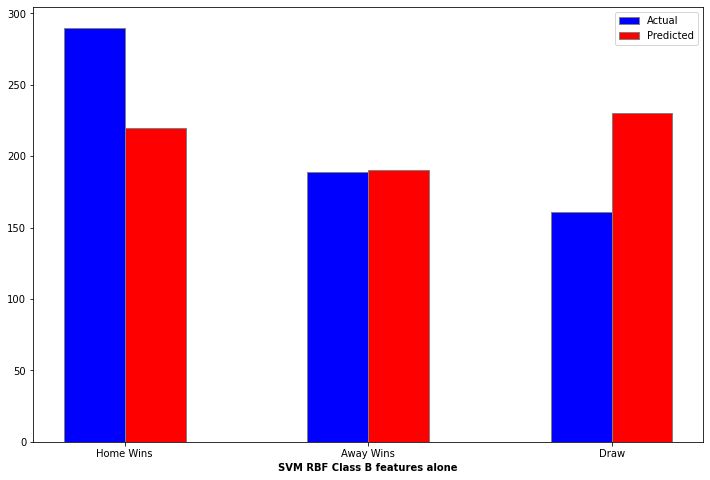

In [45]:
import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
      
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 
   
# Adding Xticks  
plt.xlabel('SVM RBF Class B features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")   
plt.show()